# Austin_Animal_Center_Statistical_Data_analysis

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
combined = pd.read_csv('aac_intakes_outcomes.csv')

In [3]:
# Drop the row with missing value in sex
combine = combined.dropna(subset=['sex_upon_intake', 'sex_upon_outcome','outcome_type'])
#replace outcome_subtype with 'Normal'
combine['outcome_subtype'] = combine['outcome_subtype'].replace(np.nan, 'Normal')
# Drop values of October of 2013 and  April of 2014
combine = combine.loc[(combine['intake_monthyear'] != '2013-10') | (combine['outcome_monthyear'] != '2013-10') |(combine['outcome_monthyear'] != '2018-04')]
# Drop the Unknown sex of Dog or Cat
combine = combine.loc[((combine['animal_type'] == 'Dog') & (combine['sex_upon_intake'] != 'Unknown')) | ((combine['animal_type'] == 'Cat') & (combine['sex_upon_intake'] != 'Unknown')) | (combine['animal_type'] == 'Bird') | (combine['animal_type'] == 'Other')]

/Users/elisechen/anaconda3/envs/TestEnv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Primary questions

Does Animal types (Dog or cat) affect addoption rate?

In [4]:
# select the column
cat_outcome = combine.loc[(combine.animal_type == 'Cat')].outcome_type.values.squeeze()
dog_outcome = combine.loc[(combine.animal_type == 'Dog')].outcome_type.values.reshape(-1)
cat_outcome
print(len(cat_outcome))

26958


In [5]:
#def the percentaion of an object function
def percent(array,item):
    count = 0
    for i in range(len(array)):
        if array[i] == item:
            count = count + 1
            
    percent = count/len(array)
    return percent

In [8]:
np.random.seed(47)
#define sampling function
def sampling_percent(df,item,size):
    fac = np.empty(size)
    
    for i in range(size):
        samples = np.random.choice(df,size=len(df))
        fac[i] = percent(samples,item=item)
    return fac


In [26]:
cat_adoption_rate = sampling_percent(df=cat_outcome,item="Adoption",size=5000)

In [27]:
dog_adoption_rate = sampling_percent(df=dog_outcome,item="Adoption",size=5000)

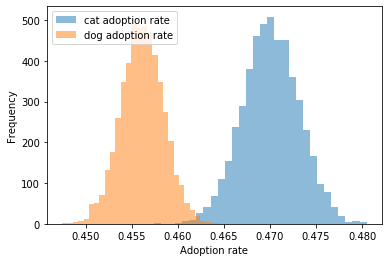

In [28]:
#plot histograms plots

_ = plt.hist(cat_adoption_rate, bins=30, alpha=0.5, label='cat adoption rate')
_ = plt.hist(dog_adoption_rate, bins=30, alpha=0.5, label='dog adoption rate')
_ = plt.xlabel('Adoption rate')
_ = plt.ylabel('Frequency')
_ = plt.legend()

In [12]:
def permutation_sample(data1, data2):

    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [13]:
def draw_perm_reps(data_1, data_2, func, size=1):
    
    perm_replicates = np.empty(size)

    for i in range(size):
        
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [17]:
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1)-np.mean(data_2)
    return diff


#Null hypothesis: Dog adoption rate is equal to cat adoption rate. 
#Alternative hypothesis: Dog adoption rate is different from cat adoption rate. 

In [18]:
obeserved_difference = diff_of_means(cat_adoption_rate,dog_adoption_rate)
perm_difference = draw_perm_reps(cat_adoption_rate,dog_adoption_rate,diff_of_means, size=10000)
p = np.sum(perm_difference >= obeserved_difference) / len(perm_difference)
print('p-value =', p)

p-value = 0.0


p value is small enough to reject null hypothesis. 

In [ ]:
#T-test

In [30]:
#cat
cat_mean = np.mean(cat_adoption_rate)
cat_n = len(cat_adoption_rate)
cat_s = np.std(cat_adoption_rate)

In [31]:
#dog
dog_mean = np.mean(dog_adoption_rate)
dog_n = len(dog_adoption_rate)
dog_s = np.std(dog_adoption_rate)

In [32]:
#sp
sp = np.sqrt(((cat_n-1)*(cat_s**2)+(dog_n-1)*(dog_s**2))/(cat_n+dog_n-2))
sp

0.002718918742469962

In [33]:
#t
t = (cat_mean-dog_mean)/(sp*np.sqrt(1/cat_n+1/dog_n))
t

256.67815935079665

In [34]:
#p value
p = norm.pdf(t)
p

0.0

T-test get same result that the null hypothesis is rejected. 